#📌 Extracción

In [1]:
# 📌 Extracción
import json
import pandas as pd

# Cargar datos desde archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Normalizar estructuras anidadas
df = pd.json_normalize(data)

# Vista previa
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [2]:
# 🔧 Transformación

# Renombrar columnas para facilitar lectura
df.columns = df.columns.str.replace('customer.', '')
df.columns = df.columns.str.replace('phone.', '')
df.columns = df.columns.str.replace('internet.', '')
df.columns = df.columns.str.replace('account.', '')
df.columns = df.columns.str.replace('Charges.', 'Charges_')

# Eliminar registros con campos vacíos en la columna 'Churn'
df = df[df['Churn'].isin(['Yes', 'No'])]

# Asegurar que los montos sean numéricos
df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce')
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')

# Eliminar filas con datos faltantes
df.dropna(inplace=True)

# Verificación
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

/tmp/ipython-input-2-1549543270.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charges_Monthly'] = pd.to_numeric(df['Charges_Monthly'], errors='coerce')
/tmp/ipython-input-2-1549543270.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')
/tmp/ipython-input-2-1549543270.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

#📊 Carga y análisis

/tmp/ipython-input-3-250079075.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


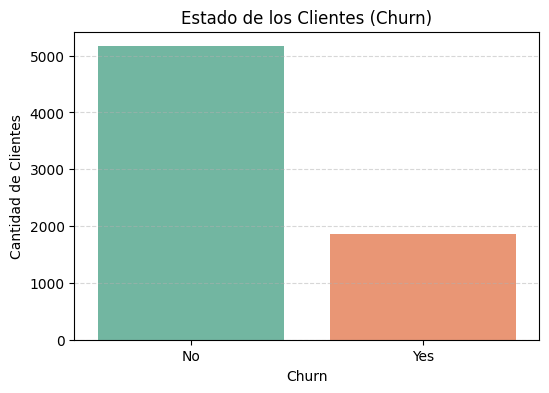

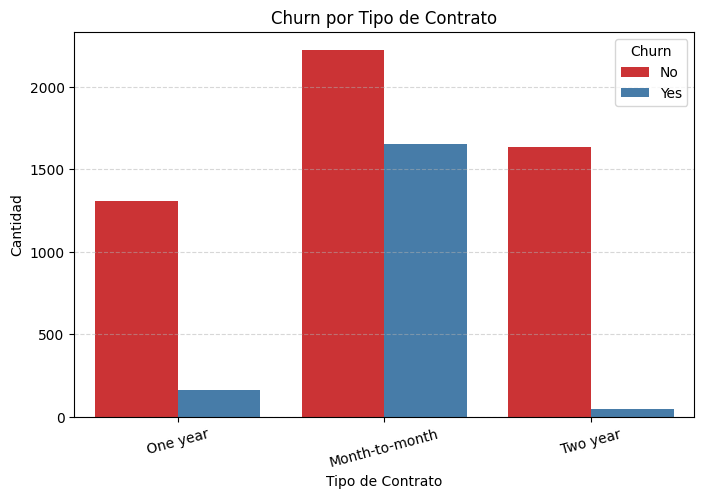

/tmp/ipython-input-3-250079075.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges_Monthly', palette='coolwarm')


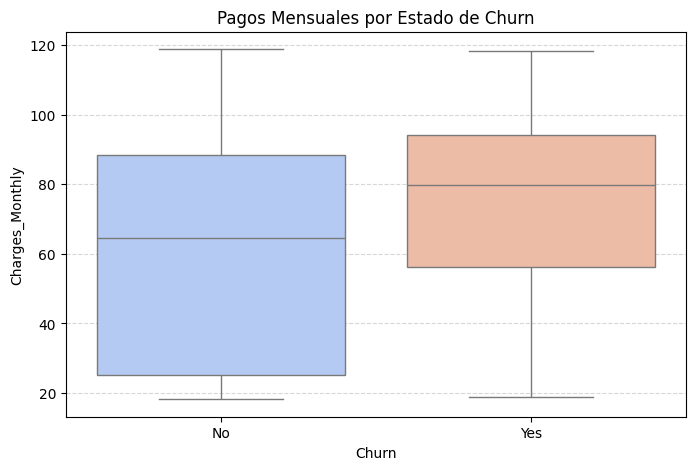

In [3]:
# 📊 Carga y análisis
import matplotlib.pyplot as plt
import seaborn as sns

# Estado de churn
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

# Visualización de distribución de churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Estado de los Clientes (Churn)")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Churn")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Churn por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title("Churn por Tipo de Contrato")
plt.ylabel("Cantidad")
plt.xlabel("Tipo de Contrato")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Boxplot de pagos mensuales por churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='Charges_Monthly', palette='coolwarm')
plt.title("Pagos Mensuales por Estado de Churn")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#📄Informe final

In [4]:
# 📄 Informe final
churn_rate = churn_percent['Yes']
contract_risk = df[df['Churn'] == 'Yes']['Contract'].value_counts(normalize=True) * 100
payment_risk = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts(normalize=True).head(3)

print("📌 Resumen de Insights:\n")
print(f"🔻 Tasa de evasión total: {churn_rate:.2f}%\n")
print("📊 Clientes con mayor evasión por tipo de contrato:")
print(contract_risk, "\n")
print("💳 Métodos de pago con más evasión:")
print(payment_risk)


📌 Resumen de Insights:

🔻 Tasa de evasión total: 26.58%

📊 Clientes con mayor evasión por tipo de contrato:
Contract
Month-to-month    88.550027
One year           8.881755
Two year           2.568218
Name: proportion, dtype: float64 

💳 Métodos de pago con más evasión:
PaymentMethod
Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Name: proportion, dtype: float64
